In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

In [13]:
df = pd.read_csv('../data/raw/daily-website-visitors.csv', parse_dates=['Date'])

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [15]:
numeric_columns = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(int)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Page.Loads         2167 non-null   int32 
 4   Unique.Visits      2167 non-null   int32 
 5   First.Time.Visits  2167 non-null   int32 
 6   Returning.Visits   2167 non-null   int32 
dtypes: int32(4), int64(2), object(1)
memory usage: 101.6+ KB
None
            Row        Day  Day.Of.Week  Page.Loads  Unique.Visits  \
Date                                                                 
2014-09-14    1     Sunday            1        2146           1582   
2014-09-15    2     Monday            2        3621           2528   
2014-09-16    3    Tuesday            3        3698           2630   
2014-09-17    4  Wednesday          

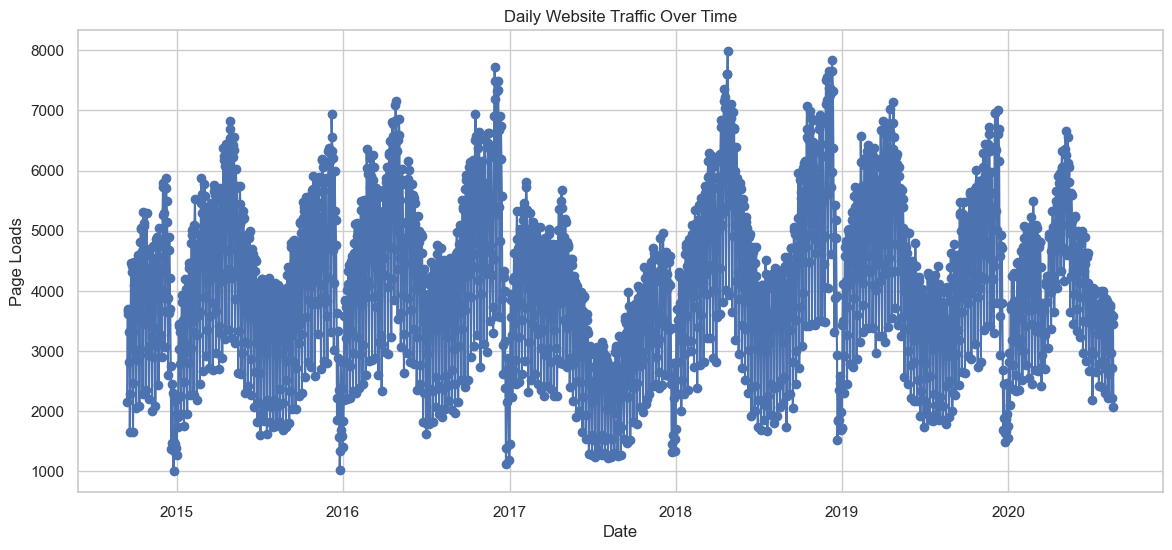

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Page.Loads'], marker='o', linestyle='-', color='b')
plt.title('Daily Website Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.show()

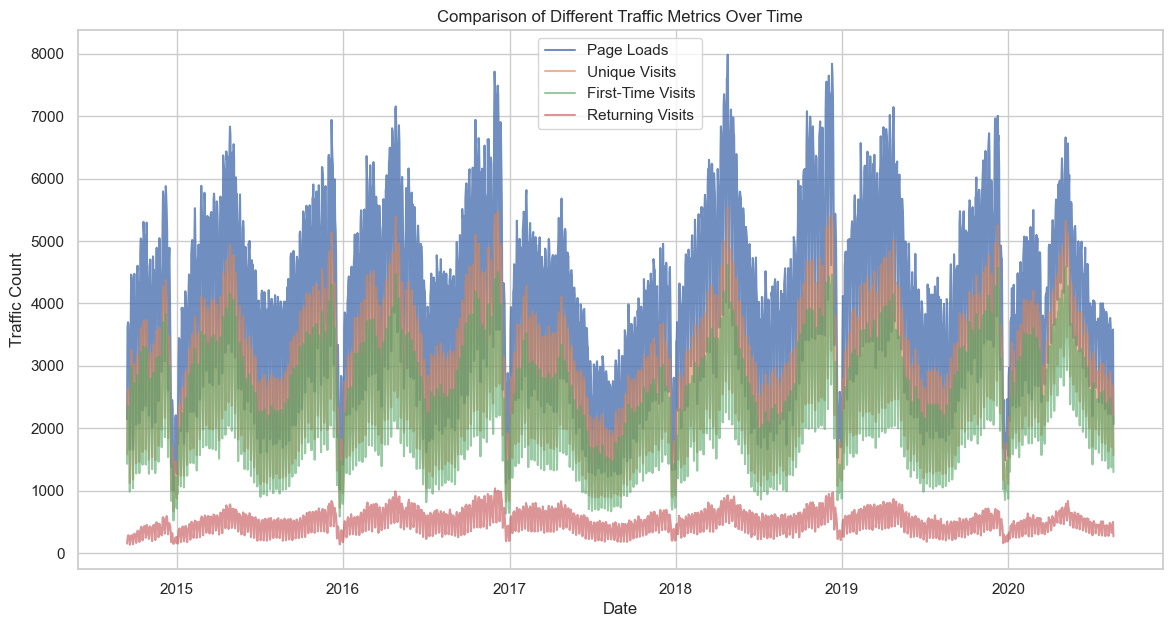

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Page.Loads'], label='Page Loads', alpha=0.8)
plt.plot(df.index, df['Unique.Visits'], label='Unique Visits', alpha=0.6)
plt.plot(df.index, df['First.Time.Visits'], label='First-Time Visits', alpha=0.6)
plt.plot(df.index, df['Returning.Visits'], label='Returning Visits', alpha=0.6)
plt.legend()
plt.title('Comparison of Different Traffic Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.show()


In [18]:
print(df[['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']].describe())

        Page.Loads  Unique.Visits  First.Time.Visits  Returning.Visits
count  2167.000000    2167.000000        2167.000000       2167.000000
mean   4116.989386    2943.646516        2431.824181        511.822335
std    1350.977843     977.886472         828.704688        168.736370
min    1002.000000     667.000000         522.000000        133.000000
25%    3114.500000    2226.000000        1830.000000        388.500000
50%    4106.000000    2914.000000        2400.000000        509.000000
75%    5020.500000    3667.500000        3038.000000        626.500000
max    7984.000000    5541.000000        4616.000000       1036.000000


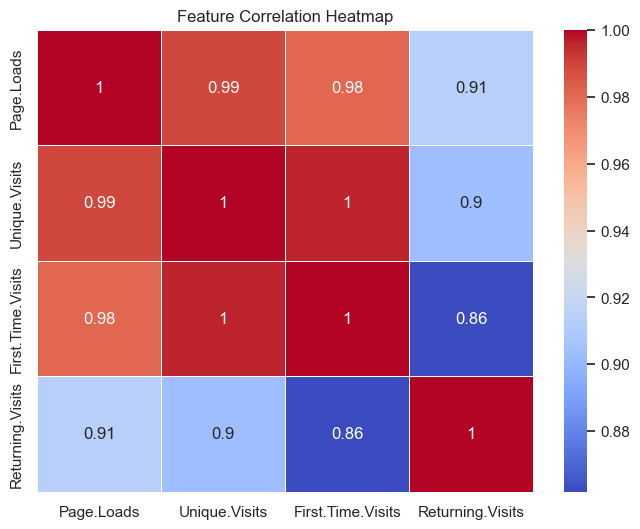

In [19]:
correlation_matrix = df[['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


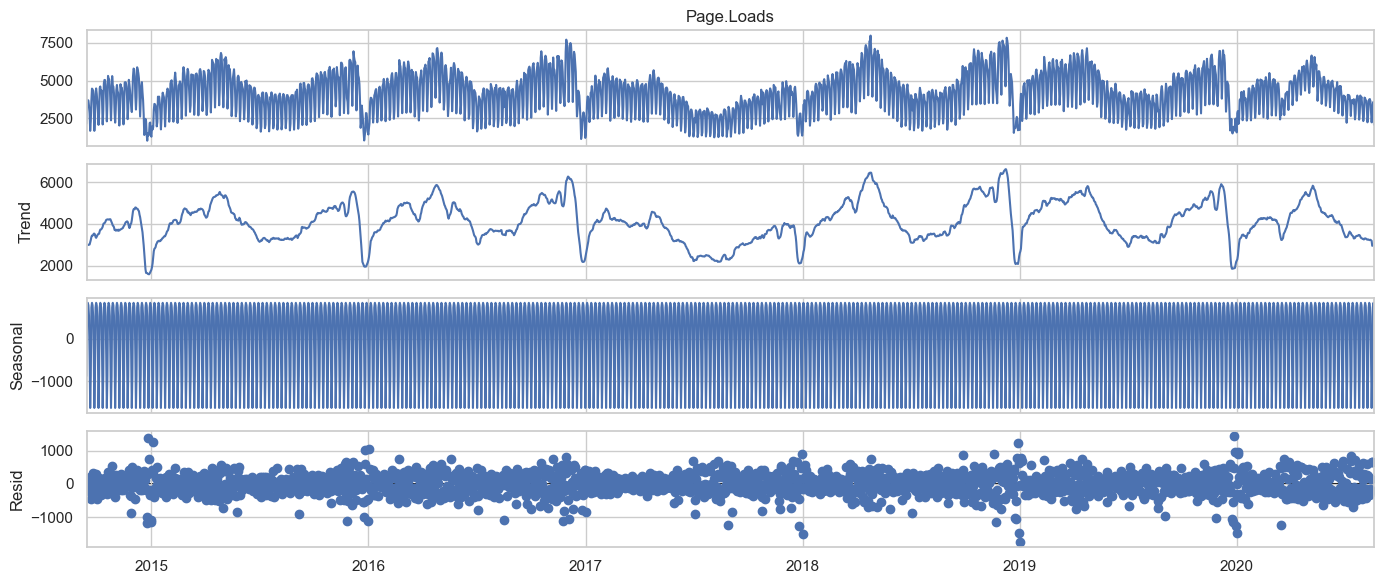

In [20]:
decomposition = seasonal_decompose(df['Page.Loads'], model='additive', period=7)
decomposition.plot()
plt.show()
